In [6]:
import os
import glob
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from skimage.io import imread
import pandas as pd
import math

In [2]:
#Global variables for CSV reading
#Current directory
working_path = os.getcwd()

#Paths
data_file_path = os.path.join(working_path, "Phage_Intensity_values.csv")

In [12]:
df = pd.read_csv(data_file_path, sep=',', na_values='*')
df['Slice'] = df['Slice']*0.02 #20 miliseconds per frame
df.head(5)

,Slice,Mean
0,0.02,-0.001219
1,0.04,-0.000158
2,0.06,-0.000624
3,0.08,-0.000555
4,0.10,-0.000926


In [13]:
out = np.fft.fft(df["Slice"]);
freq = np.fft.fftfreq(df["Slice"].shape[-1])

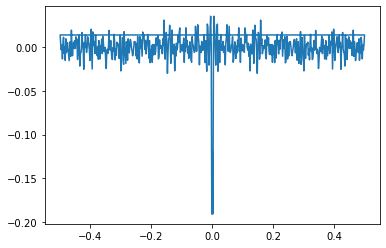

In [15]:
plt.plot(freq, out.real)
plt.show()

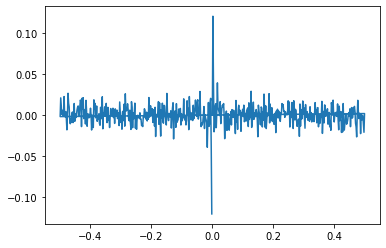

In [16]:
plt.plot(freq, out.imag)
plt.show()

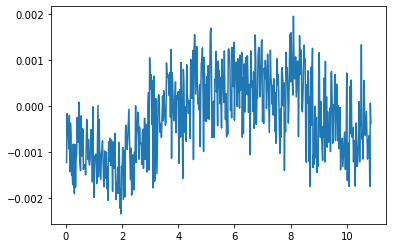

In [18]:
plt.plot(df["Slice"], df["Mean"])
plt.show()

In [37]:
im = imread("Kymograph_alongPilus.tif")
X = np.arange(0,110)
Y = np.arange(0,272)
X, Y = np.meshgrid(X, Y)
np.shape(X)

(272, 110)

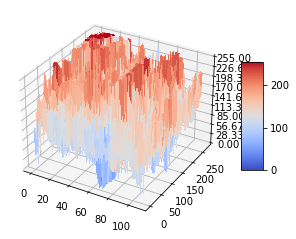

In [38]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, im, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [30]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
np.shape(X)

(40, 40)

In [29]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
np.shape(x)

(100, 100)